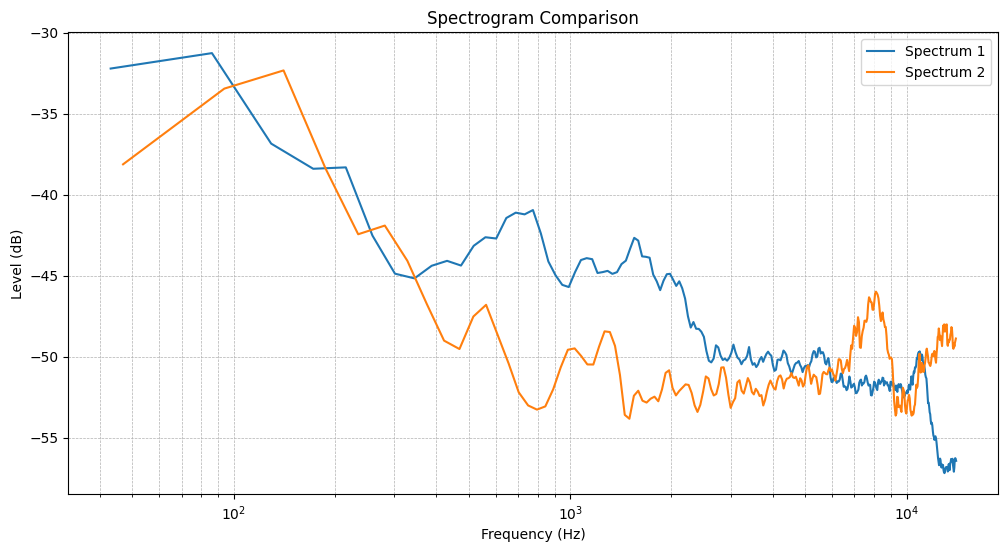

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file1 = "spectrum-sample1.txt"
file2 = "spectrum-sample2.txt"

df1 = pd.read_csv(file1, sep="\t")
df2 = pd.read_csv(file2, sep="\t")

plt.figure(figsize=(12, 6))

plt.plot(df1['Frequency (Hz)'], df1['Level (dB)'], label="Spectrum 1")
plt.plot(df2['Frequency (Hz)'], df2['Level (dB)'], label="Spectrum 2")

plt.xscale('log')

plt.xlabel("Frequency (Hz)")
plt.ylabel("Level (dB)")
plt.title("Spectrogram Comparison")
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)

plt.show()


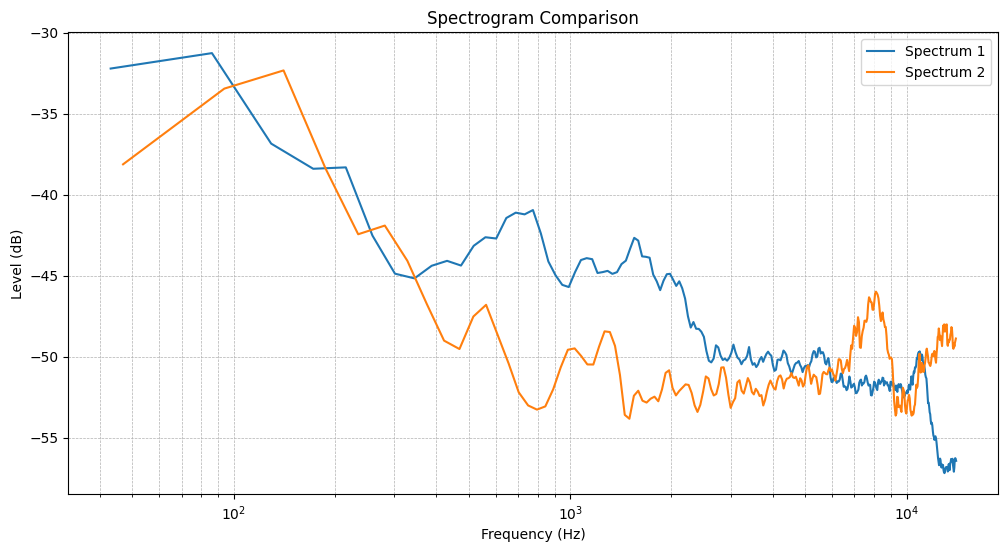

DTW Distance: 652.763797


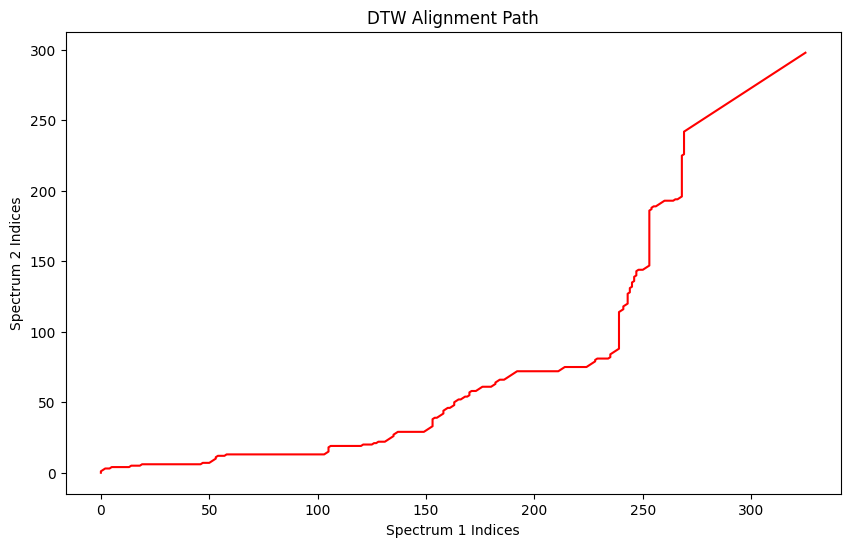

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from dtw import dtw

# Load the spectra data
file1 = "spectrum-sample1.txt"
file2 = "spectrum-sample2.txt"

df1 = pd.read_csv(file1, sep="\t")
df2 = pd.read_csv(file2, sep="\t")

# Plot the spectrograms
plt.figure(figsize=(12, 6))
plt.plot(df1['Frequency (Hz)'], df1['Level (dB)'], label="Spectrum 1")
plt.plot(df2['Frequency (Hz)'], df2['Level (dB)'], label="Spectrum 2")
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Level (dB)")
plt.title("Spectrogram Comparison")
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.show()

# Extract the feature vectors for DTW
# Assuming "Level (dB)" represents the feature vector of interest
x = df1['Level (dB)'].values.reshape(-1, 1)
y = df2['Level (dB)'].values.reshape(-1, 1)

# Perform DTW analysis
distance, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=lambda x, y: np.abs(x - y))

# Print DTW alignment cost
print(f"DTW Distance: {distance}")

# Plot the alignment without accumulated cost
plt.figure(figsize=(10, 6))
plt.plot(path[0], path[1], 'r')  # alignment path
plt.xlabel("Spectrum 1 Indices")
plt.ylabel("Spectrum 2 Indices")
plt.title("DTW Alignment Path") # If the alignment path is diagonal, the two sequences are similar
plt.show()
